In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("osteoporosis.csv")
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [ ]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [ ]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [ ]:
from sklearn import preprocessing
preprocessing_data=preprocessing.LabelEncoder()
data['Gender'] = preprocessing_data.fit_transform(data['Gender'])
data['Hormonal Changes'] = preprocessing_data.fit_transform(data['Hormonal Changes'])
data['Family History'] = preprocessing_data.fit_transform(data['Family History'])
data['Race/Ethnicity'] = preprocessing_data.fit_transform(data['Race/Ethnicity'])
data['Body Weight'] = preprocessing_data.fit_transform(data['Body Weight'])
data['Calcium Intake'] = preprocessing_data.fit_transform(data['Calcium Intake'])
data['Vitamin D Intake'] = preprocessing_data.fit_transform(data['Vitamin D Intake'])
data['Physical Activity'] = preprocessing_data.fit_transform(data['Physical Activity'])
data['Smoking'] = preprocessing_data.fit_transform(data['Smoking'])
data['Alcohol Consumption'] = preprocessing_data.fit_transform(data['Alcohol Consumption'])
data['Medical Conditions'] = preprocessing_data.fit_transform(data['Medical Conditions'])
data['Medications'] = preprocessing_data.fit_transform(data['Medications'])
data['Prior Fractures'] = preprocessing_data.fit_transform(data['Prior Fractures'])

In [ ]:
print(data)

           Id  Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
0     1734616   69       0                 0               1               1   
2     1797916   89       0                 1               0               2   
5     1799320   41       1                 0               1               2   
11    1575029   55       0                 0               1               2   
13    1718362   81       1                 0               1               2   
...       ...  ...     ...               ...             ...             ...   
1930  1765280   18       0                 1               1               0   
1936  1137807   26       1                 0               1               2   
1938  1735783   25       0                 0               0               2   
1946  1124694   22       1                 1               1               1   
1952  1957629   23       1                 1               0               2   

      Body Weight  Calcium Intake  Vita

In [ ]:
data

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
2,1797916,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
5,1799320,41,1,0,1,2,0,1,1,0,1,0,1,0,1,1
11,1575029,55,0,0,1,2,1,0,1,1,0,0,1,0,0,1
13,1718362,81,1,0,1,2,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1765280,18,0,1,1,0,1,1,0,1,0,0,1,0,0,0
1936,1137807,26,1,0,1,2,0,1,0,1,1,0,1,0,0,0
1938,1735783,25,0,0,0,2,1,1,1,1,0,0,0,0,0,0
1946,1124694,22,1,1,1,1,1,0,0,1,1,0,1,0,0,0


In [ ]:
X = data[["Age", "Gender", "Hormonal Changes", "Family History", "Race/Ethnicity", "Body Weight", "Calcium Intake", "Vitamin D Intake", "Physical Activity", "Smoking", "Alcohol Consumption", "Medical Conditions", "Medications", "Prior Fractures"]].copy()
Y = data["Osteoporosis"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

      Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
22     77       1                 1               0               0   
156    75       0                 1               1               0   
1784   21       1                 1               1               1   
168    36       1                 0               1               2   
684    43       1                 0               1               0   
...   ...     ...               ...             ...             ...   
1532   20       1                 1               1               2   
1093   19       0                 1               0               0   
664    22       0                 0               1               1   
270    34       0                 1               0               0   
971    18       0                 1               1               0   

      Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  \
22              0               0                 0                  1   

In [ ]:
print(X_test)

      Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
766    64       1                 0               1               2   
1527   18       1                 0               1               0   
330    75       1                 1               0               2   
1562   34       0                 1               1               0   
1907   25       1                 0               1               0   
...   ...     ...               ...             ...             ...   
394    18       0                 1               0               2   
586    18       1                 1               0               2   
1231   34       1                 0               1               2   
1564   18       0                 0               0               0   
735    87       1                 0               0               0   

      Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  \
766             0               0                 1                  0   

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaling = data.columns[data.columns != 'Osteoporosis']
data[feature_scaling] = scaler.fit_transform(data[feature_scaling])
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,0.700684,1.331905,-1.00316,-0.941756,0.959798,-0.050329,0.935810,1.035324,1.028806,1.035324,0.918163,0.0,1.048493,0.0,0.99685,1
2,0.943660,2.247970,-1.00316,1.061846,-1.041886,1.176934,-1.068593,-0.965881,1.028806,-0.965881,-1.089131,0.0,-0.953750,0.0,-1.00316,1
5,0.949050,0.049415,0.99685,-0.941756,0.959798,1.176934,-1.068593,1.035324,1.028806,-0.965881,0.918163,0.0,1.048493,0.0,0.99685,1
11,0.088112,0.690660,-1.00316,-0.941756,0.959798,1.176934,0.935810,-0.965881,1.028806,1.035324,-1.089131,0.0,1.048493,0.0,-1.00316,1
13,0.638293,1.881544,0.99685,-0.941756,0.959798,1.176934,0.935810,-0.965881,-0.972001,1.035324,0.918163,0.0,-0.953750,0.0,-1.00316,1


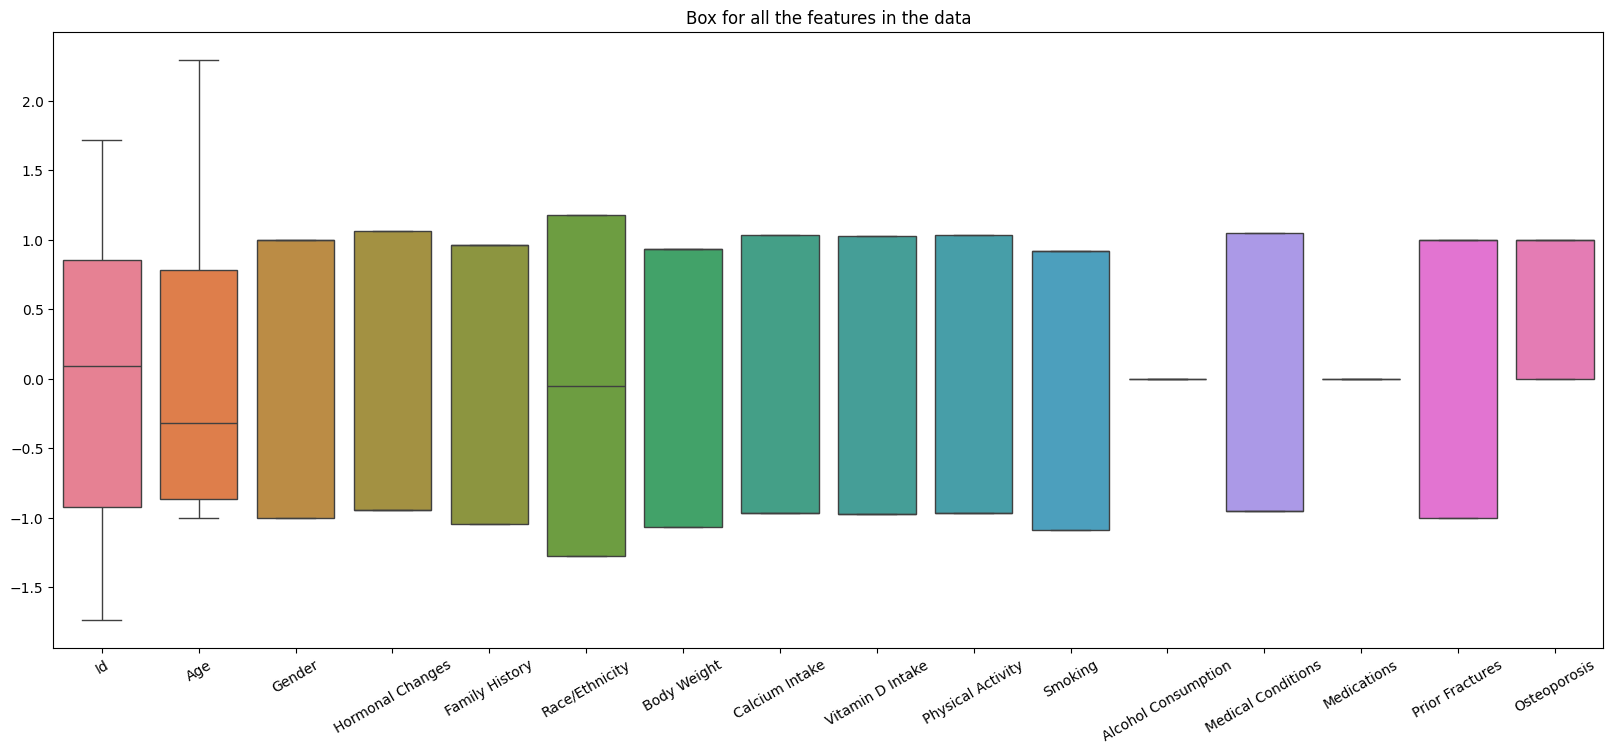

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.boxplot(data=data)
plt.title("Box for all the features in the data")
plt.xticks(rotation=30)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classification=KNeighborsClassifier(n_neighbors=9)
KNN_Classification.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
KNN_Classification.score(X_test,Y_test)

0.765625

In [ ]:
from sklearn.svm import SVC
classification = SVC(kernel = 'rbf', random_state=0)
classification.fit(X_train,Y_train)

SVC(random_state=0)

In [ ]:
classification.score(X_test,Y_test)

0.78125